In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from mediapipe import solutions

from utils import *
from data_utils import prepare_dataframe, generate_dataframe
from custom_pose_landmarks import CustomPoseLandmark

In [2]:
# Selected values of pose landmarks corresponding to PoseLandmark class from MediaPipe library
values = [0, 11, 12, 13, 14, 15, 16, 19, 20, 23, 24, 25, 26, 27, 28, 31, 32]

# MediaPipe solutions
mp_drawing = solutions.drawing_utils
mp_pose = solutions.pose

pose = CustomPoseLandmark(mp_pose, values)

In [3]:
main_path = Path('../data/raw/squat/')
dataframe = prepare_dataframe(pose)

for file_path in main_path.iterdir():
    tmp = generate_dataframe(
        source=file_path,
        mp_pose=mp_pose,
        mp_drawing=mp_drawing,
        custom_pose=pose,
        video_display=True
    )

    dataframe = pd.concat([dataframe, tmp], ignore_index=True)
    break

In [51]:
df = dataframe.iloc[:, 2:]

df2 = df.iloc[:, [col_idx for col_idx in range(df.shape[1]) if col_idx % 3 != 2]]
df2.head()

,nose_x,nose_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,...,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,left_foot_index_x,left_foot_index_y,right_foot_index_x,right_foot_index_y,thorax_x,thorax_y
0,0.580823,0.373949,0.590139,0.420385,0.408871,0.406552,0.623835,0.488442,0.285580,0.472879,...,0.585352,0.877356,0.408570,0.885080,0.668166,0.925310,0.452521,0.943272,0.499505,0.413469
1,0.580109,0.374057,0.589022,0.421825,0.405288,0.406545,0.622396,0.489338,0.285388,0.475276,...,0.585020,0.877086,0.409090,0.899652,0.668756,0.923911,0.458898,0.963448,0.497155,0.414185
2,0.579587,0.373618,0.586828,0.422206,0.401607,0.406396,0.617302,0.491014,0.281802,0.477650,...,0.584933,0.877082,0.409398,0.900052,0.670330,0.923771,0.462133,0.965745,0.494218,0.414301
3,0.578398,0.373395,0.583670,0.423076,0.396469,0.406258,0.615290,0.492870,0.280265,0.481583,...,0.585178,0.877811,0.411261,0.903373,0.672433,0.923779,0.462895,0.966466,0.490070,0.414667
4,0.576812,0.373007,0.582043,0.423559,0.395252,0.406536,0.613107,0.492939,0.279272,0.482140,...,0.585432,0.877903,0.411327,0.904994,0.674551,0.923631,0.463939,0.967741,0.488648,0.415048


In [72]:
(df['left_shoulder_z'] + df['right_shoulder_z']).mean()

0.18123357804906248

In [90]:
import math

In [76]:
df['left_hip_z'] + df['right_hip_z']

0    -0.000295
1    -0.000411
2    -0.000450
3    -0.000437
4    -0.000424
        ...   
56   -0.000348
57   -0.000350
58   -0.000348
59   -0.000323
60   -0.000339
Length: 61, dtype: float64

In [102]:
slope = (df['left_hip_z'] - df['right_hip_z']) / (df['left_hip_x'] - df['right_hip_x'])
slope.apply(lambda x: np.degrees(np.arctan(x)))

0     64.056372
1     65.006610
2     65.841189
3     65.298268
4     65.864820
        ...    
56    55.787805
57    58.106398
58    59.104984
59    58.479400
60    58.756177
Length: 61, dtype: float64

In [101]:
np.degrees(np.arctan(1))

45.0

In [73]:
df[['left_hip_z', 'right_hip_z']].describe()

,left_hip_z,right_hip_z
count,61.000000,61.000000
mean,0.109177,-0.109549
std,0.010026,0.010050
min,0.086432,-0.126063
25%,0.101757,-0.117909
50%,0.109264,-0.109653
75%,0.117534,-0.102096
max,0.125646,-0.086812


In [61]:
df.columns

Index(['nose_x', 'nose_y', 'nose_z', 'left_shoulder_x', 'left_shoulder_y',
       'left_shoulder_z', 'right_shoulder_x', 'right_shoulder_y',
       'right_shoulder_z', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z',
       'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'left_wrist_x',
       'left_wrist_y', 'left_wrist_z', 'right_wrist_x', 'right_wrist_y',
       'right_wrist_z', 'left_index_x', 'left_index_y', 'left_index_z',
       'right_index_x', 'right_index_y', 'right_index_z', 'left_hip_x',
       'left_hip_y', 'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'right_knee_x',
       'right_knee_y', 'right_knee_z', 'left_ankle_x', 'left_ankle_y',
       'left_ankle_z', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z',
       'left_foot_index_x', 'left_foot_index_y', 'left_foot_index_z',
       'right_foot_index_x', 'right_foot_index_y', 'right_foot_index_z',
       'thorax_x', 'thorax_y', 'thorax_z'],
      dtype='

In [60]:
df.iloc[0, ::2].to_numpy()

array([ 0.58082336, -0.13084407,  0.42038521,  0.40887091, -0.05612045,
        0.48844156,  0.28557986, -0.28168148,  0.43671975,  0.31179863,
       -0.57495499,  0.42335483,  0.34180748, -0.62723458,  0.60018438,
        0.43512982, -0.10946803,  0.74222672,  0.43495986, -0.15809421,
        0.87735635,  0.40856987, -0.0034248 ,  0.92530984,  0.45252088,
       -0.21886164,  0.41346863])

In [55]:
df2.loc[60].to_numpy()

array([0.56681758, 0.3466295 , 0.60460711, 0.41470891, 0.40318498,
       0.40646446, 0.64005053, 0.50206786, 0.28999114, 0.48238835,
       0.71496195, 0.45273143, 0.31366521, 0.42939883, 0.72912896,
       0.43998319, 0.33389136, 0.40628907, 0.56860369, 0.59095776,
       0.44493255, 0.58893925, 0.59271342, 0.7313506 , 0.4410978 ,
       0.74279314, 0.5841772 , 0.87851113, 0.3944287 , 0.8815046 ,
       0.67098927, 0.92997348, 0.43547872, 0.95368195, 0.50389606,
       0.41058668])

In [56]:
df2.columns

Index(['nose_x', 'nose_y', 'left_shoulder_x', 'left_shoulder_y',
       'right_shoulder_x', 'right_shoulder_y', 'left_elbow_x', 'left_elbow_y',
       'right_elbow_x', 'right_elbow_y', 'left_wrist_x', 'left_wrist_y',
       'right_wrist_x', 'right_wrist_y', 'left_index_x', 'left_index_y',
       'right_index_x', 'right_index_y', 'left_hip_x', 'left_hip_y',
       'right_hip_x', 'right_hip_y', 'left_knee_x', 'left_knee_y',
       'right_knee_x', 'right_knee_y', 'left_ankle_x', 'left_ankle_y',
       'right_ankle_x', 'right_ankle_y', 'left_foot_index_x',
       'left_foot_index_y', 'right_foot_index_x', 'right_foot_index_y',
       'thorax_x', 'thorax_y'],
      dtype='object')

<Axes: >

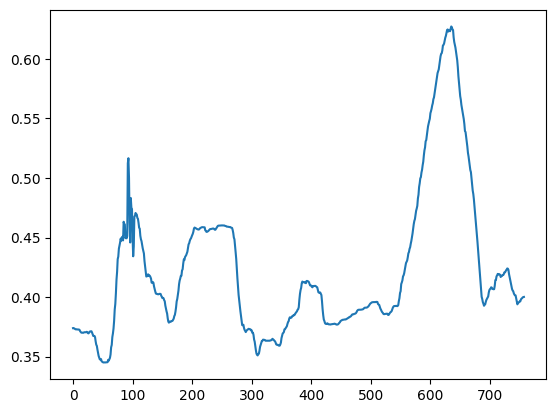

In [8]:
dataframe.loc[dataframe["Id"] == "movie_01", "nose_y"].plot()

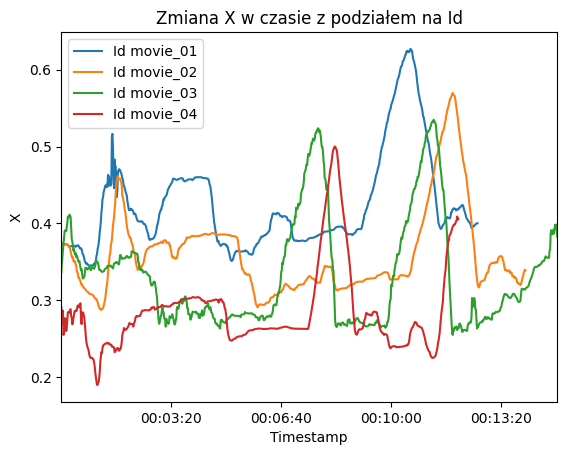

In [11]:
import matplotlib.pyplot as plt

df = dataframe[['Id', 'timestamp', 'nose_y']]

fig, ax = plt.subplots()
for key, group in df.groupby('Id'):
    group.plot(x='timestamp', y='nose_y', ax=ax, label=f'Id {key}')

plt.legend()
plt.title('Zmiana X w czasie z podziałem na Id')
plt.xlabel('Timestamp')
plt.ylabel('X')

plt.show()

In [9]:
import cv2

# Ścieżka do pliku wideo wejściowego
input_video_path = r'../data/raw/squat/movie_01.mp4'

# Liczba klatek na sekundę, którą chcesz uzyskać
desired_fps = 15

# Otwórz wideo
cap = cv2.VideoCapture(input_video_path)

# Pobierz aktualną liczbę klatek na sekundę wideo
original_fps = cap.get(cv2.CAP_PROP_FPS)

# Ustaw nową liczbę klatek na sekundę
cap.set(cv2.CAP_PROP_FPS, desired_fps)


# # Ścieżka do pliku wideo wyjściowego
# output_video_path = 'nazwa_pliku_wyjsciowego.mp4'

# # Utwórz obiekt VideoWriter do zapisu zmodyfikowanego wideo
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter(output_video_path, fourcc, desired_fps, (int(cap.get(3)), int(cap.get(4))))



False

30.0

In [4]:
import cv2

def adjust_fps(input_path, output_path):
    # Otwórz wideo
    cap = cv2.VideoCapture(input_path)

    # Pobierz aktualną liczbę klatek na sekundę wideo
    original_fps = cap.get(cv2.CAP_PROP_FPS)

    # Ustaw docelową liczbę klatek na sekundę
    desired_fps = 30

    # Współczynnik do interpolacji lub obcięcia klatek
    factor = int(original_fps / desired_fps)

    # Jeśli liczba klatek wynosi dokładnie 30, zwróć oryginalną ścieżkę
    if original_fps == desired_fps:
        cap.release()
        return input_path

    # Utwórz obiekt VideoWriter do zapisu zmodyfikowanego wideo
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, desired_fps, (int(cap.get(3)), int(cap.get(4))))

    # Odczytuj klatki, interpoluj lub obcinaj i zapisuj zmodyfikowane wideo
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Jeśli oryginalne wideo ma więcej klatek, obetnij
        # Jeśli ma mniej, interpoluj
        for _ in range(factor):
            out.write(frame)

    # Zamknij obiekty VideoCapture i VideoWriter
    cap.release()
    out.release()

    return output_path

# # Przykład użycia funkcji
# input_path = 'sciezka/do/filmu_wejsciowego.mp4'
# output_path = 'sciezka/do/filmu_wyjsciowego.mp4'

# adjusted_path = adjust_fps(input_path, output_path)

# # Jeśli funkcja zwróciła oryginalną ścieżkę, wypisz informację
# if adjusted_path == input_path:
#     print(f"Film miał już 30 klatek na sekundę. Nie wykonano żadnych zmian.")
# else:
#     print(f"Zmodyfikowany film został zapisany pod ścieżką: {adjusted_path}")


In [15]:
import cv2
import numpy as np

def generate_artificial_video(output_path, duration_seconds=30, fps=60):
    # Ustaw rozmiar klatek i kolor tła
    frame_width, frame_height = 640, 480
    background_color = (255, 255, 255)

    # Utwórz obiekt VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    # Generuj klatki sztucznego filmu
    for _ in range(int(duration_seconds * fps)):
        frame = np.ones((frame_height, frame_width, 3), dtype=np.uint8) * background_color

        # Poruszający się kwadrat
        square_size = 50
        x_position = int((_ + 1) * frame_width / (duration_seconds * fps))
        cv2.rectangle(frame, (x_position, frame_height // 2 - square_size // 2),
                      (x_position + square_size, frame_height // 2 + square_size // 2),
                      (0, 0, 255), -1)

        # Zapisz klatkę
        out.write(frame)

    # Zamknij obiekt VideoWriter
    out.release()

In [16]:
# Przykład użycia
artificial_video_path = r'../test.mp4'
generate_artificial_video(artificial_video_path)

# Ustawienia do funkcji adjust_fps
output_path = r'../test_adjusted.mp4'
adjusted_path = adjust_fps(artificial_video_path, output_path)

print(f"Sztuczny film został wygenerowany pod ścieżką: {artificial_video_path}")
print(f"Zmodyfikowany film został zapisany pod ścieżką: {adjusted_path}")

Sztuczny film został wygenerowany pod ścieżką: ../test.mp4
Zmodyfikowany film został zapisany pod ścieżką: ../test_adjusted.mp4


In [8]:
artificial_video_path

'../test.mp4'

In [7]:
output_path

'../test_adjusted.mp4'

In [28]:
adjusted_path

'../test_adjusted.mp4'

In [17]:
cap = cv2.VideoCapture(artificial_video_path)

while cap.isOpened():
    ret, image = cap.read()
            
    cv2.imshow('Video', image)
        
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break

    if not cap.isOpened():
        exit()
            
cap.release()
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(artificial_video_path)
cap.get(cv2.CAP_PROP_FPS)

60.0

In [19]:
cap = cv2.VideoCapture(adjusted_path)
cap.get(cv2.CAP_PROP_FPS)

30.0